Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

## Import data into Python environment.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =pd.read_csv(r"C:\Users\sahu\Documents\PYTHON+PROJECT-COMCAST+TELECOM+CONSUMER+DATA\Comcast_telecom_complaints_data.csv",index_col=0) 
data.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
data.dtypes

Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [4]:
#checking for null value
data[data.isnull()].count()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


## Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [6]:
data['Date_index']=data['Date_month_year']+" "+data['Time']
data['Date_index']

Ticket #
250635     22-Apr-15 3:53:50 PM
223441    04-Aug-15 10:22:56 AM
242732     18-Apr-15 9:55:47 AM
277946    05-Jul-15 11:59:35 AM
307175     26-May-15 1:25:26 PM
                  ...          
213550     04-Feb-15 9:13:18 AM
318775     06-Feb-15 1:24:39 PM
331188     06-Sep-15 5:28:41 PM
360489    23-Jun-15 11:13:30 PM
363614    24-Jun-15 10:28:33 PM
Name: Date_index, Length: 2224, dtype: object

In [7]:
data['Date_index'] = pd.to_datetime(data['Date_index'])
data['Date_index']

Ticket #
250635   2015-04-22 15:53:50
223441   2015-08-04 10:22:56
242732   2015-04-18 09:55:47
277946   2015-07-05 11:59:35
307175   2015-05-26 13:25:26
                 ...        
213550   2015-02-04 09:13:18
318775   2015-02-06 13:24:39
331188   2015-09-06 17:28:41
360489   2015-06-23 23:13:30
363614   2015-06-24 22:28:33
Name: Date_index, Length: 2224, dtype: datetime64[ns]

In [8]:
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])
data['Date_month_year']

Ticket #
250635   2015-04-22
223441   2015-08-04
242732   2015-04-18
277946   2015-07-05
307175   2015-05-26
            ...    
213550   2015-02-04
318775   2015-02-06
331188   2015-09-06
360489   2015-06-23
363614   2015-06-24
Name: Date_month_year, Length: 2224, dtype: datetime64[ns]

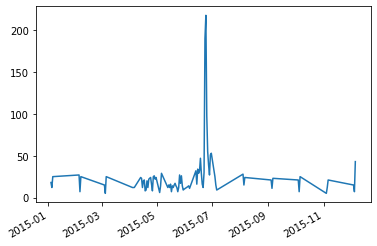

In [9]:
#number of customer complaints daily

data['Date_month_year'].value_counts().plot()

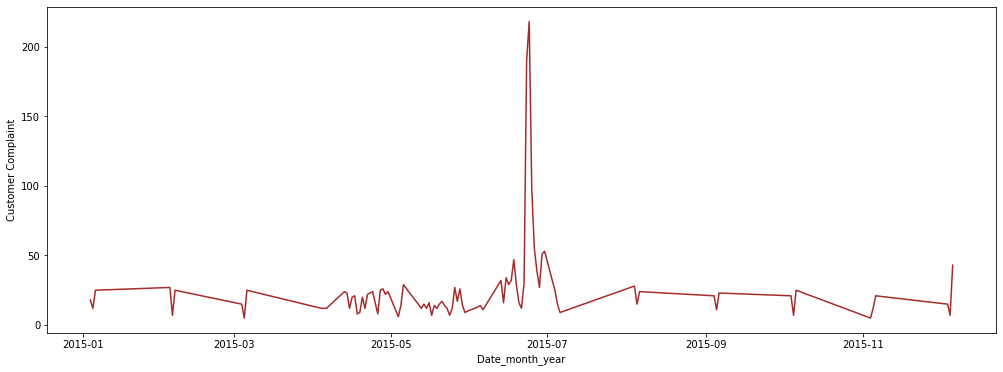

In [10]:
#number of customer complaints daily
plt.figure(figsize=(17,6))
daily= data.groupby('Date_month_year').count().reset_index()
lp = sns.lineplot(x='Date_month_year', y= 'Customer Complaint', data = daily, sort=False, color = 'brown',markers = "o")

In [11]:
data['Month'] =  data['Date_month_year'].apply(lambda x: x.month)
data['Month'] 

Ticket #
250635    4
223441    8
242732    4
277946    7
307175    5
         ..
213550    2
318775    2
331188    9
360489    6
363614    6
Name: Month, Length: 2224, dtype: int64

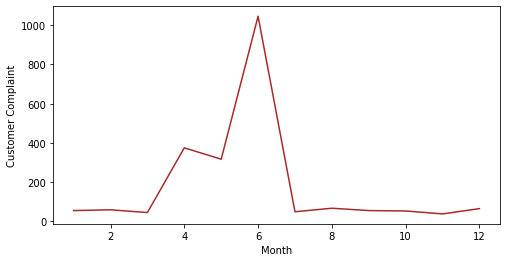

In [12]:
#number of customer complaints monthly
plt.figure(figsize=(8,4))
bymonth = data.groupby('Month').count().reset_index()
lp = sns.lineplot(x='Month', y= 'Customer Complaint', data = bymonth, sort=False, color = 'brown',markers = "o")

## Provide a table with the frequency of complaint types.

In [13]:
data['Complaint_Type_Freq']=data['Customer Complaint'].str.title() 
freq_of_comp_types=data['Complaint_Type_Freq'].value_counts()
freq_of_complaints_types=pd.DataFrame(freq_of_comp_types)
freq_of_complaints_types.head(10)

,Complaint_Type_Freq
Comcast,102
Comcast Data Cap,30
Comcast Internet,29
Comcast Data Caps,21
Comcast Billing,18
Internet Speed,15
Comcast Service,15
Data Caps,13
Unfair Billing Practices,13
Data Cap,12


## Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [14]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [15]:
data['New_status']=['Open'if (Status=='Open' or Status =='Pending') else 'Closed' for Status in data['Status']]
data['New_status']

Ticket #
250635    Closed
223441    Closed
242732    Closed
277946      Open
307175    Closed
           ...  
213550    Closed
318775    Closed
331188    Closed
360489    Closed
363614      Open
Name: New_status, Length: 2224, dtype: object

In [16]:
data

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_index,Month,Complaint_Type_Freq,New_status
Ticket #,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,Comcast Cable Internet Speeds,Closed
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,Payment Disappear - Service Got Disconnected,Closed
242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,Speed And Service,Closed
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,Comcast Imposed A New Usage Cap Of 300Gb That ...,Open
307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,Comcast Not Working And No Service To Boot,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,2,Service Availability,Closed
318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,2,Comcast Monthly Billing For Returned Modem,Closed
331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,9,Complaint About Comcast,Closed


## - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

#### Which state has the maximum complaints
#### Which state has the highest percentage of unresolved complaints

In [17]:
status=data.groupby(['State']).size().sort_values(ascending=False).to_frame().rename({0:"No. of Complaint"},axis=1)[:10]
status

,No. of Complaint
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143
Pennsylvania,130
Michigan,115
Washington,98
Colorado,80


In [18]:
data.groupby(['State','New_status']).size()

State          New_status
Alabama        Closed        17
               Open           9
Arizona        Closed        14
               Open           6
Arkansas       Closed         6
                             ..
Virginia       Open          11
Washington     Closed        75
               Open          23
West Virginia  Closed         8
               Open           3
Length: 77, dtype: int64

In [19]:
status_complaints=data.groupby(['State','New_status']).size().unstack().fillna(0)
status_complaints.head(10)

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


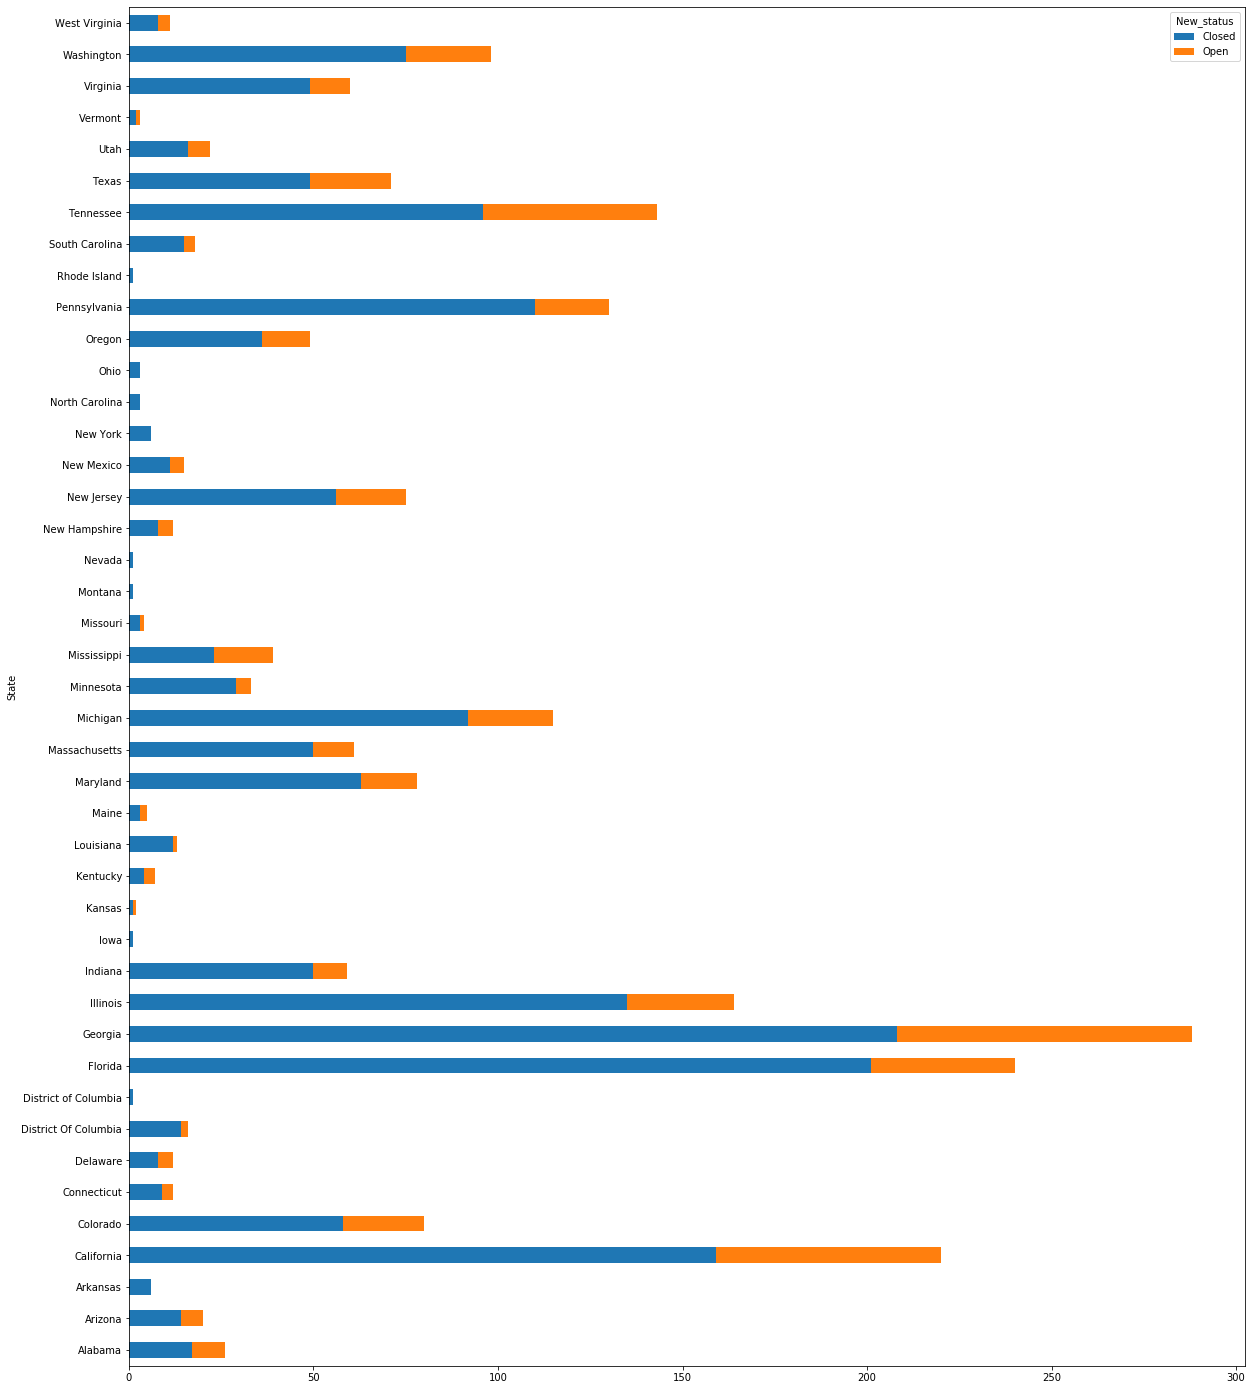

In [20]:
status_complaints.plot(kind='barh',figsize=(20,25),stacked=True)
plt.rcParams.update({'font.size':30})

In [21]:
max_complaint=pd.DataFrame(status.head())
max_complaint

,No. of Complaint
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


#### Georgia has the maximum complaints

In [22]:
status_complaints['Unresolved_complaint_%'] = status_complaints['Open']/status_complaints['Open'].sum()*100


In [23]:
pd.DataFrame(status_complaints['Unresolved_complaint_%'].sort_values(ascending=False).head())

,Unresolved_complaint_%
State,
Georgia,15.473888
California,11.798839
Tennessee,9.090909
Florida,7.543520
Illinois,5.609284


#### Georgia has the highest percentage of unresolved complaints

## - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [24]:
complaints_resolved = data.groupby(['Received Via','New_status']).size().unstack().fillna(0)
complaints_resolved['complaint_resolved_%'] = complaints_resolved['Closed']/complaints_resolved['Closed'].sum()*100
pd.DataFrame(complaints_resolved['complaint_resolved_%'])

,complaint_resolved_%
Received Via,
Customer Care Call,50.615114
Internet,49.384886


## Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


In [25]:
import nltk
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
text=data['Customer Complaint'].values

In [28]:
wc= WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1200,
                      height=1000).generate(str(text))

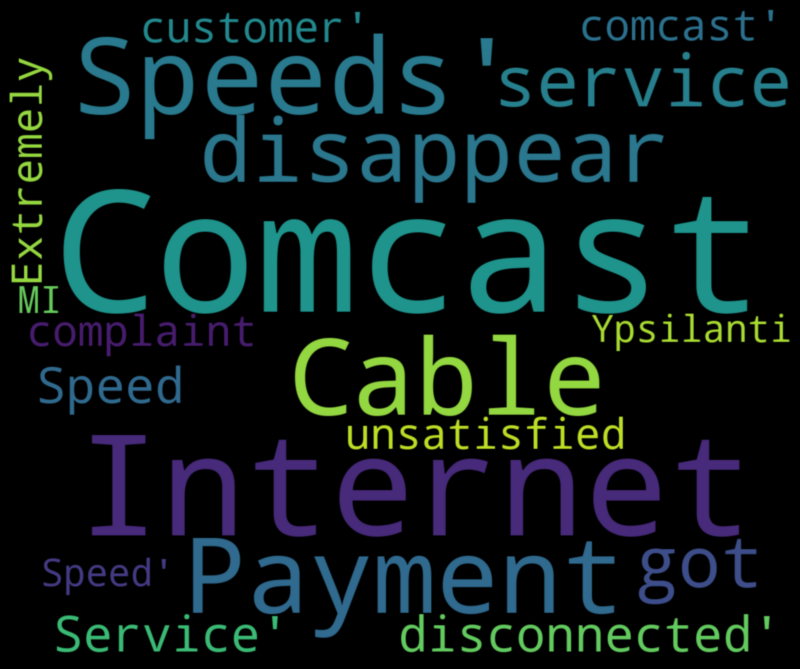

In [29]:
fig=plt.figure(figsize=(15,10),facecolor='k',edgecolor='w')
plt.imshow(wc,interpolation='bicubic')
plt.axis('off')
plt.tight_layout()
plt.show()


#### internet complaints are maximum

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [34]:
doc_complete = data['Customer Complaint'].tolist()
doc_complete

['Comcast Cable Internet Speeds',
 'Payment disappear - service got disconnected',
 'Speed and Service',
 'Comcast Imposed a New Usage Cap of 300GB that punishes streaming.',
 'Comcast not working and no service to boot',
 'ISP Charging for arbitrary data limits with overage fees',
 'Throttling service and unreasonable data caps',
 'Comcast refuses to help troubleshoot and correct my service.',
 'Comcast extended outages',
 'Comcast Raising Prices and Not Being Available To Ask Why',
 'Billing after service was asked to be disconnected',
 'YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE',
 'Comcast Violating Open Internet Rules by Blocking HBO Go Access on Sony Consoles',
 'Internet speed',
 'Internet Disconnects Every Night',
 'Internet complaint',
 'Internet Availability and Speed',
 'Comcast owes me $65 and claims I need to return equipment I never had',
 'Horrible Internet Service',
 'Failure to provide services that I am billed for.',
 'Internet out all the time but they have a mono

In [35]:

doc_clean = [clean(doc).split() for doc in doc_complete]

In [36]:
pip install --u gensim

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <archive url/path> ...

ambiguous option: --u (--upgrade, --upgrade-strategy, --use-pep517, --user?)


In [37]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\sahu\appdata\roaming\python\python37\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [38]:
import gensim
from gensim import corpora

In [39]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [40]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [41]:
from gensim.models import LdaModel

In [42]:
num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)


In [43]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.145*"comcast" + 0.073*"service" + 0.070*"issue" + 0.057*"internet" + 0.053*"charge" + 0.034*"xfinity" + 0.030*"billing" + 0.025*"throttling" + 0.018*"day" + 0.014*"bill"')

(1, '0.113*"comcast" + 0.066*"bill" + 0.057*"service" + 0.036*"without" + 0.022*"month" + 0.021*"account" + 0.018*"charge" + 0.016*"email" + 0.014*"unauthorized" + 0.012*"change"')

(2, '0.143*"comcast" + 0.112*"billing" + 0.094*"complaint" + 0.055*"practice" + 0.052*"unfair" + 0.040*"pricing" + 0.017*"charged" + 0.017*"back" + 0.014*"payment" + 0.012*"fee"')

(3, '0.170*"data" + 0.137*"cap" + 0.128*"comcast" + 0.032*"usage" + 0.026*"fee" + 0.020*"internet" + 0.018*"paying" + 0.013*"limit" + 0.012*"charging" + 0.011*"monthly"')

(4, '0.206*"comcast" + 0.172*"service" + 0.094*"internet" + 0.041*"billing" + 0.028*"customer" + 0.022*"poor" + 0.014*"problem" + 0.014*"monopolistic" + 0.009*"terrible" + 0.009*"incorrect"')

(5, '0.050*"contract" + 0.040*"deceptive" + 0.033*"connection" + 0.030*"business" + 0.029*"f

In [44]:
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic#'+"{}".format(i)]=[i[0] for i in words]

In [45]:
pd.DataFrame(word_dict)

,Topic#0,Topic#1,Topic#2,Topic#3,Topic#4,Topic#5,Topic#6,Topic#7,Topic#8
0,comcast,comcast,comcast,data,comcast,contract,comcast,access,internet
1,service,bill,billing,cap,service,deceptive,cable,get,speed
2,issue,service,complaint,comcast,internet,connection,comcastxfinity,intermittent,slow
3,internet,without,practice,usage,billing,business,broadband,several,comcast
4,charge,month,unfair,fee,customer,false,bandwidth,shitty,service
5,xfinity,account,pricing,internet,poor,failure,promised,time,price
6,billing,charge,charged,paying,problem,advertising,xfinitycomcast,loss,help
7,throttling,email,back,limit,monopolistic,appointment,outage,10,cable
8,day,unauthorized,payment,charging,terrible,unreliable,week,improper,high
9,bill,change,fee,monthly,incorrect,sale,communication,area,connectivity


In [46]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pyLDAvis.gensim

In [48]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)